In [1]:
import pandas as pd
import numpy as np
import os
import glob
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Reading the csv data as dataframes
df1=pd.read_csv(r"C:\\Users\\Gayathri\\OneDrive\\Desktop\\prj6\\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\\Users\\Gayathri\\OneDrive\\Desktop\\prj6\\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\\Users\\Gayathri\\OneDrive\\Desktop\\prj6\\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\\Users\Gayathri\\OneDrive\\Desktop\\prj6\\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\\Gayathri\\OneDrive\\Desktop\\prj6\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")


In [3]:
# Shape of each dataframes
dfs=[df1,df2,df3,df4,df5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(169071, 11)


In [4]:
# Concating all dataframes to a single dataframe
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [5]:
# Shape of the final dataframe
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
915269,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
915270,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
915271,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months
915272,2023-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,785000.0,63 years 02 months


In [6]:
# Checking the head of the dataframe    
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [7]:
# Checking the tail of the dataframe
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
915269,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
915270,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
915271,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months
915272,2023-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,785000.0,63 years 02 months
915273,2023-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,01 TO 03,179.0,Multi Generation,1987,975000.0,63 years 01 month


In [8]:
# Checking the shape of the dataframe
df.shape

(915274, 11)

In [9]:
# Checking the Information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915274 entries, 0 to 915273
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  object 
 1   town                 915274 non-null  object 
 2   flat_type            915274 non-null  object 
 3   block                915274 non-null  object 
 4   street_name          915274 non-null  object 
 5   storey_range         915274 non-null  object 
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  object 
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
 10  remaining_lease      206224 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.8+ MB


In [10]:
# Checking the number of labels in each column
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  408 labels
town :  27 labels
flat_type :  8 labels
block :  2699 labels
street_name :  584 labels
storey_range :  25 labels
floor_area_sqm :  210 labels
flat_model :  34 labels
lease_commence_date :  56 labels
resale_price :  9346 labels
remaining_lease :  720 labels


In [11]:
# Checking for missing values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [ ]:
# droping remaining_lease
df = df.drop(columns='remaining_lease')

In [14]:
# After droping the remaining_lease column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

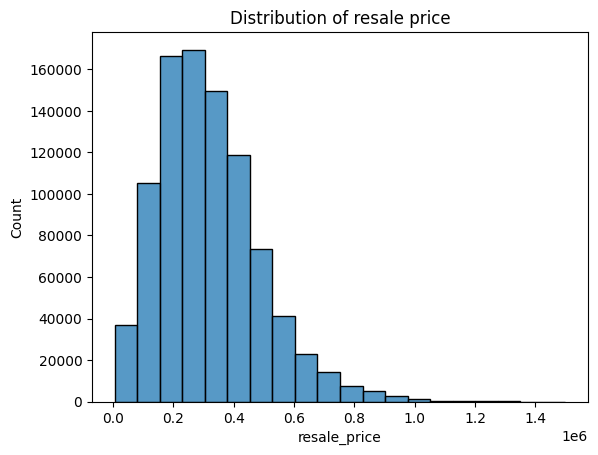

In [15]:
# Visualize the distribution of the resale price column
sns.histplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')
# plt.grid()
plt.show()

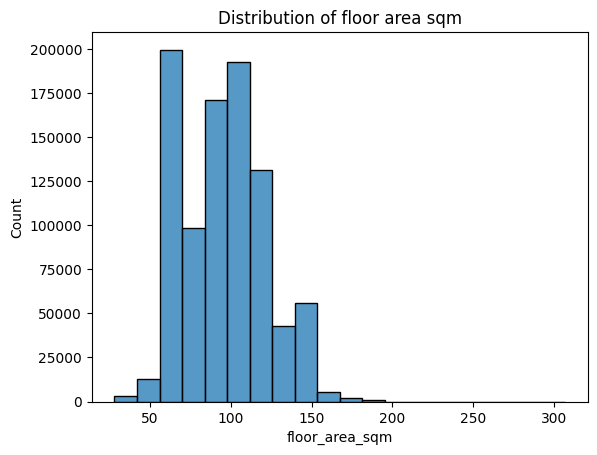

In [16]:
# Visualize the distribution of the floor area sqm column
sns.histplot(df['floor_area_sqm'], bins = 20)
plt.title('Distribution of floor area sqm')
# plt.grid()
plt.show()

In [17]:
df['flat_type'].value_counts()

flat_type
4 ROOM              347255
3 ROOM              293071
5 ROOM              192701
EXECUTIVE            68921
2 ROOM               11487
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       260
Name: count, dtype: int64

<Axes: xlabel='flat_type'>

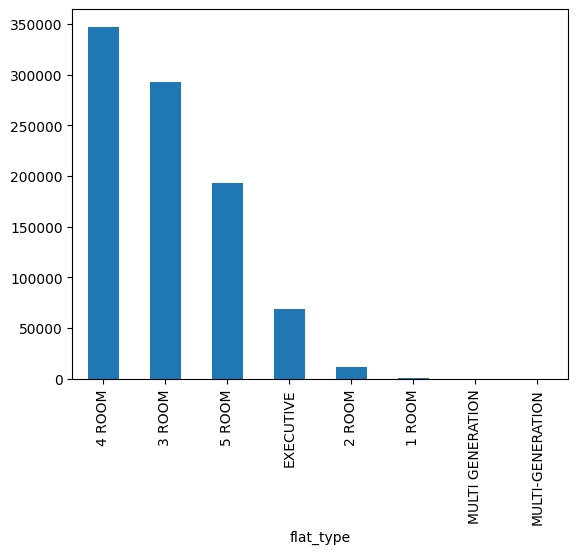

In [18]:
df['flat_type'].value_counts().plot(kind = 'bar')

In [19]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [20]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

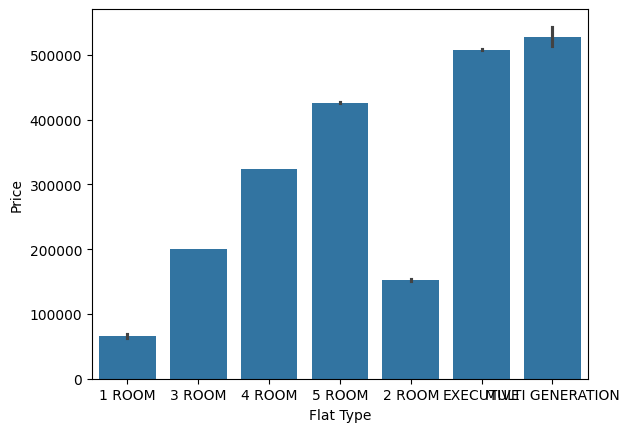

In [21]:
# Visualize the distribution of the flat_type column
sns.barplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()


In [22]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

flat_type
4    347255
3    293071
5    192701
6     68921
2     11487
1      1300
7       539
Name: count, dtype: int64

In [23]:
# Visualize the distribution of the flat_type column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [24]:
# Converting the flat_model column to lowercase
df['flat_model'] = df['flat_model'].str.lower()

In [25]:
# Unique lables in flat_model column
df['flat_model'].nunique()

21

In [27]:
# Visualize the distribution of the flat_model column
df['flat_model'].value_counts()


flat_model
model a                   260366
improved                  239011
new generation            187608
simplified                 57140
premium apartment          45593
standard                   42282
apartment                  35116
maisonette                 29360
model a2                   10006
dbss                        3185
model a-maisonette          2056
adjoined flat               1233
terrace                      688
multi generation             539
type s1                      430
type s2                      212
improved-maisonette          125
2-room                       108
premium apartment loft       104
premium maisonette            86
3gen                          26
Name: count, dtype: int64

In [28]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()

flat_modelcode= le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [29]:
df['flat_modelcode'].value_counts()

flat_modelcode
8     260366
5     239011
12    187608
16     57140
13     45593
17     42282
3      35116
7      29360
10     10006
4       3185
9       2056
2       1233
18       688
11       539
19       430
20       212
6        125
0        108
14       104
15        86
1         26
Name: count, dtype: int64

In [30]:
# Town column 
df['town'].nunique()

27

In [31]:
# Visualize the distribution of the town column
df['town'].value_counts()

town
TAMPINES           79128
YISHUN             69252
BEDOK              66079
JURONG WEST        65819
WOODLANDS          64668
ANG MO KIO         51653
HOUGANG            50065
BUKIT BATOK        43668
CHOA CHU KANG      37764
BUKIT MERAH        33911
PASIR RIS          32923
SENGKANG           31621
TOA PAYOH          31212
QUEENSTOWN         28485
GEYLANG            27937
CLEMENTI           27802
BUKIT PANJANG      27332
KALLANG/WHAMPOA    26830
JURONG EAST        24533
SERANGOON          22636
BISHAN             21115
PUNGGOL            19802
SEMBAWANG          13427
MARINE PARADE       7986
CENTRAL AREA        7073
BUKIT TIMAH         2489
LIM CHU KANG          64
Name: count, dtype: int64

In [32]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [33]:
# Encoded value coun
df['town_code'].value_counts()

town_code
23    79128
26    69252
1     66079
13    65819
25    64668
0     51653
11    50065
3     43668
8     37764
4     33911
17    32923
21    31621
24    31212
19    28485
10    27937
9     27802
5     27332
14    26830
12    24533
22    22636
2     21115
18    19802
20    13427
16     7986
7      7073
6      2489
15       64
Name: count, dtype: int64

In [34]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [35]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [36]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [37]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [38]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [39]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])

In [40]:
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [41]:
df

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915269,2023-12,2023,12,YISHUN,26,6,643,YISHUN ST 61,10,12,10 TO 12,146.0,maisonette,7,1987,838000.0
915270,2023-12,2023,12,YISHUN,26,6,643,YISHUN ST 61,10,12,10 TO 12,142.0,apartment,3,1987,755000.0
915271,2023-12,2023,12,YISHUN,26,6,826,YISHUN ST 81,01,03,01 TO 03,142.0,apartment,3,1988,780000.0
915272,2023-12,2023,12,YISHUN,26,6,834,YISHUN ST 81,01,03,01 TO 03,142.0,apartment,3,1988,785000.0


In [43]:
df.to_csv("C:/Users/Gayathri/OneDrive/Desktop/prj6/singapore.csv")

In [44]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


In [45]:
# Dealing with datatypes
# Datatyppe of the columns
df.dtypes


month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [46]:
# Changing the datatype of numeric columns
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']]


In [47]:
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

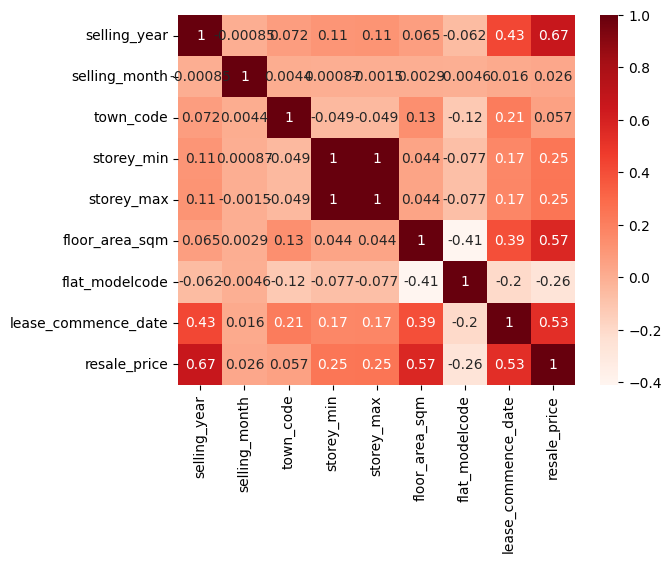

In [48]:
# Correlation matrix
corr_df = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df,  cmap="Reds",annot = True)

Training the model

In [49]:
# create x and y variables   
X = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']]
y = df['resale_price']

In [50]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

In [51]:
# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Linear Regression

In [53]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [54]:
# Accuracy score of the model
score = lin_reg.score(X_test,y_test)
print(score * 100,"%")

100.0 %


Decision Tree Regressor

In [55]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [56]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print(score * 100,"%")

99.99999123474537 %


Random Forest Regressor

In [57]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [58]:
# Accuracy of the model
score = rf_reg.score(X_test,y_test)
print(score * 100,"%")

99.9999931417953 %


Pickling the Linear Regression trained knowledge to build streamlit ML model web page

In [59]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_rfr_pkl","wb") as files:
  pickle.dump(rf_reg, files)


In [60]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_linr_pkl","wb") as files:
  pickle.dump(lin_reg, files)